### Importing Modules
- Pandas (pd): Used for data manipulation and analysis.
- Numpy (np): Essential for numerical operations and arrays.
- nltk: The Natural Language Toolkit for working with human language data.
- Future: A library for writing code that is compatible with both Python 2 and 3.
- Matplotlib.pyplot (plt): A plotting library for creating visualizations.
- Seaborn (sns): A data visualization library based on matplotlib.
These libraries will provide us with a robust set of tools for data analysis, manipulation, and visualization

In [1]:
import pandas as pd
import numpy as np
import nltk
import future
import matplotlib.pyplot as plt
import seaborn as sns


### Dataset Overview
- File: Amazon_Unlocked_Mobile.csv
- Header: The first row is considered as the header.
- Index: No specific column is set as an index.
- Delimiter: Columns are separated by commas (,).

In [ ]:
# initial dataset
intial_df=pd.read_csv('Amazon_Unlocked_Mobile.csv', header=0, index_col=False, delimiter=',')
intial_df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0


### Data Labeling

- In this step we clean the data and label the data as <br>
  >  />=4 for Positive <br>
  > =3 for Neutral <br>
  > else  Negative <br>
- Read the data from __'Amazon_Unlocked_Mobile.csv'__ and add new column for labels

In [3]:
# Defining a function to label data based on 'Rating' column
def label_data():
    # Reading data from a CSV file into a Pandas DataFrame
    rows = pd.read_csv('Amazon_Unlocked_Mobile.csv', header=0, index_col=False, delimiter=',')
    labels = []
    for cell in rows['Rating']:
        if cell >= 4:
            labels.append('positive')   # Labeling as 'positive' for good ratings
        elif cell == 3:
            labels.append('neutral')    # Labeling as 'neutral' for ratings of 3
        else:
            labels.append('negative')   # Labeling as 'negative' for poor ratings     
    # Creating a new column 'Label' in the DataFrame and assigning the labels
    rows['Label'] = labels
    # Deleting the 'Review Votes' column from the DataFrame
    del rows['Review Votes']
    # Returning the updated DataFrame with added labels
    return rows

### Data Cleaning

Remove all the rows containing blank cells. The resultant data is stored as __'labelled_dataset.csv'__

In [4]:
def clean_data(data):
    #columnwise print number of rows containing blank values
    #print data.isnull().sum()
    #replace blank values in all the cells with 'nan'
    data.replace('',np.nan,inplace=True)
    #delete all the rows which contain at least one cell with nan value
    data.dropna(axis=0, how='any', inplace=True)
    #Check the number of rows containing blank values. This should be zero now as compared to first line of this function
    #print data.isnull().sum()
    #save output csv file
    data.to_csv('labelled_dataset.csv', index=False)
    return data

### Data preprocessing

The following text preprocessing are implemented to convert raw reviews to cleaned review, so that it will be easier for us to do feature extraction in the next step.

- remove html tags using BeautifulSoup
- remove non-character such as digits and symbols
- convert to lower case
- remove stop words such as "the" and "and" if needed
- convert to root words by stemming if needed

In [5]:
def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False):
    '''
    Convert a raw review to a cleaned review
    '''
    # text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
    text = BeautifulSoup(raw_text, 'html.parser').get_text()
    letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
    words = letters_only.lower().split() # convert to lower case 
    
    if remove_stopwords: # remove stopword
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    if stemming==True: # stemming
#         stemmer = PorterStemmer()
        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text==True:  # split text
        return (words)
    
    return( " ".join(words))

### DATA ANALYSIS
- label_data: A function to label the data. The specifics of this function are not provided here, but it seems to involve some form of labeling.
- clean_data: A function for cleaning the data. This may include tasks such as handling missing values, removing duplicates, or transforming variables.

#### Visualization
- The first 5 rows of the cleaned dataset are displayed to provide a glimpse of the data structure

#### Plot Style
- The plot style is set to 'fivethirtyeight' using plt.style.use('fivethirtyeight'). This style is known for its clear and distinctive visualizations.

In [6]:
if __name__ == '__main__':
    df = label_data()
    df = clean_data(df)
plt.style.use('fivethirtyeight')

In [7]:
df

,Product Name,Brand Name,Price,Rating,Reviews,Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,positive
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",positive
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,positive
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,positive
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,positive
...,...,...,...,...,...,...
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,positive
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,neutral
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,positive
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,neutral


### 1.Top 10 most reviewed products
##### Visualization Explanation

#### Mostreviewed: 
This DataFrame is created by grouping the data by the 'Product Name' and counting the number of reviews for each product. The top 10 most reviewed products are selected and stored in this DataFrame.

#### Bar Plot: 
The Seaborn barplot function is used to create a bar plot. The x-axis represents the index of the products, the y-axis represents the count of reviews, and different products are distinguished by color.

#### Plot Settings:

- plt.ylim(1000,): Set the y-axis limit to start from 1000 to focus on products with a higher number of reviews.
- plt.xticks([]): Remove x-axis ticks for better readability.
- plt.xlabel('Products') and plt.ylabel('Reviews Count'): Label the x and y axes.
- plt.title('Top 10 Most Reviewed Products'): Provide a title for the plot.
- plt.legend(...): Display the legend to indicate product names (truncated for readability).

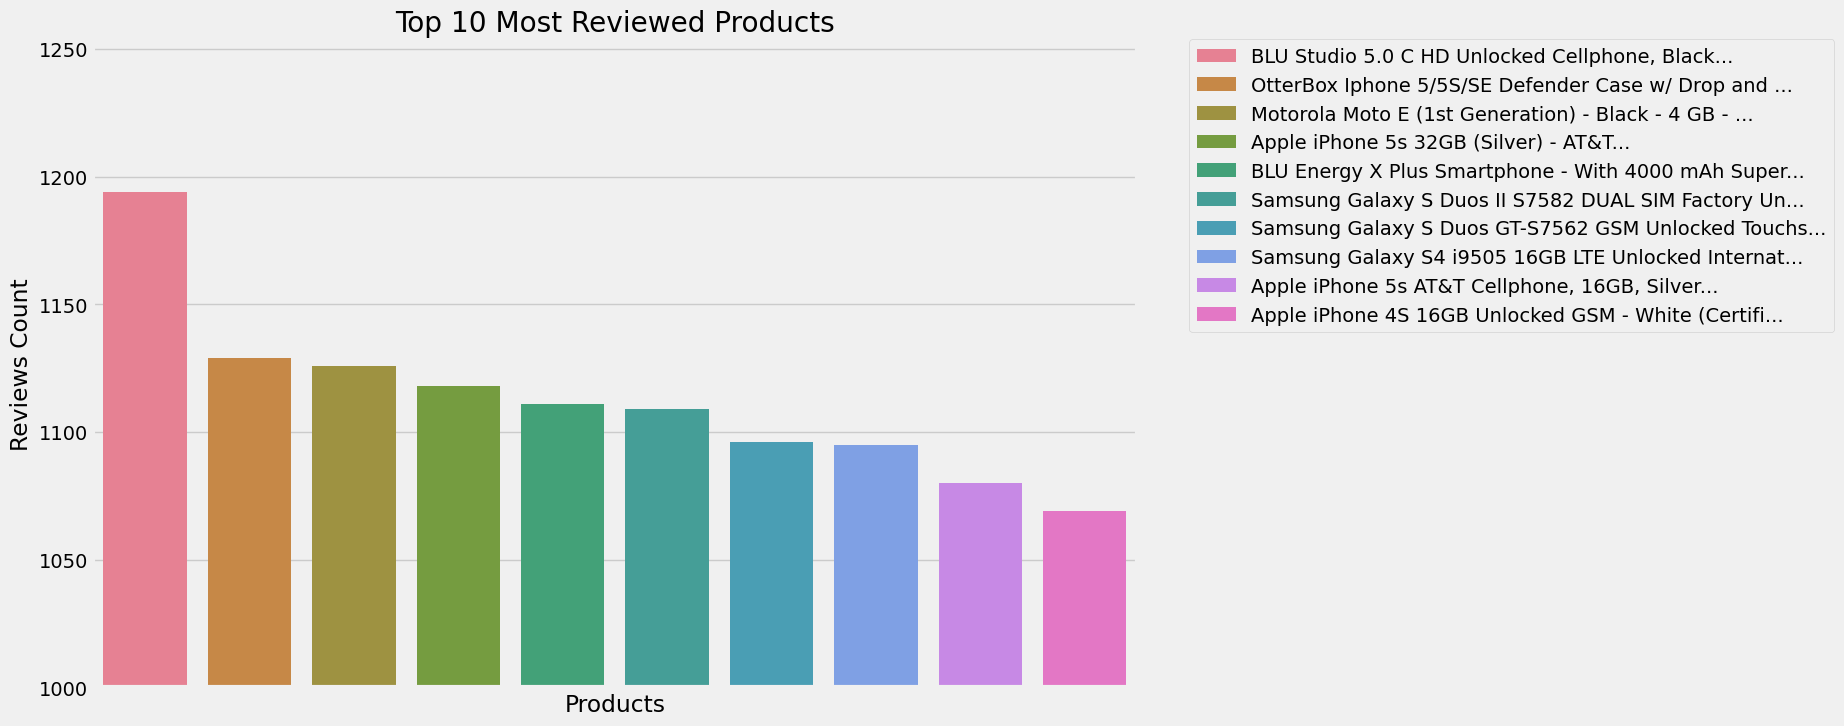

In [8]:
# Top 10 Most Reviewed Products - Visualization


mostreviewed = (df.set_index('Product Name')
                .groupby(level=0)['Reviews']
                .agg(['count'])
                .sort_values(['count'], ascending=False)[:10])

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=mostreviewed.reset_index().index, y=mostreviewed['count'],
            hue=mostreviewed.index.str[:50] + '...', dodge=False)

# Adjust plot settings
plt.ylim(1000,)
plt.xticks([])
plt.xlabel('Products')
plt.ylabel('Reviews Count')
plt.title('Top 10 Most Reviewed Products')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


### 2.Top 10 best brands

#### Bestbrand: 
This DataFrame is created by filtering products with a rating greater than 3, grouping by the 'Brand Name,' and counting the number of positive reviews for each brand. The top 10 brands with the highest count of positive reviews are selected and stored in this DataFrame.

#### Bar Plot: 
The Seaborn barplot function is used to create a bar plot. The x-axis represents the brands, the y-axis represents the count of positive reviews, and different brands are distinguished by color.

#### Plot Settings:

- plt.ylim(1000,): Set the y-axis limit to start from 1000 to focus on brands with a higher number of positive reviews.
- plt.xticks([]): Remove x-axis ticks for better readability.
- plt.xlabel('Products') and plt.ylabel('Positive Reviews Count'): Label the x and y axes.
- plt.title('Top 10 Best Brands Based on Positive Reviews'): Provide a title for the plot.
- plt.legend(...): Display the legend to indicate brand names (truncated for readability)

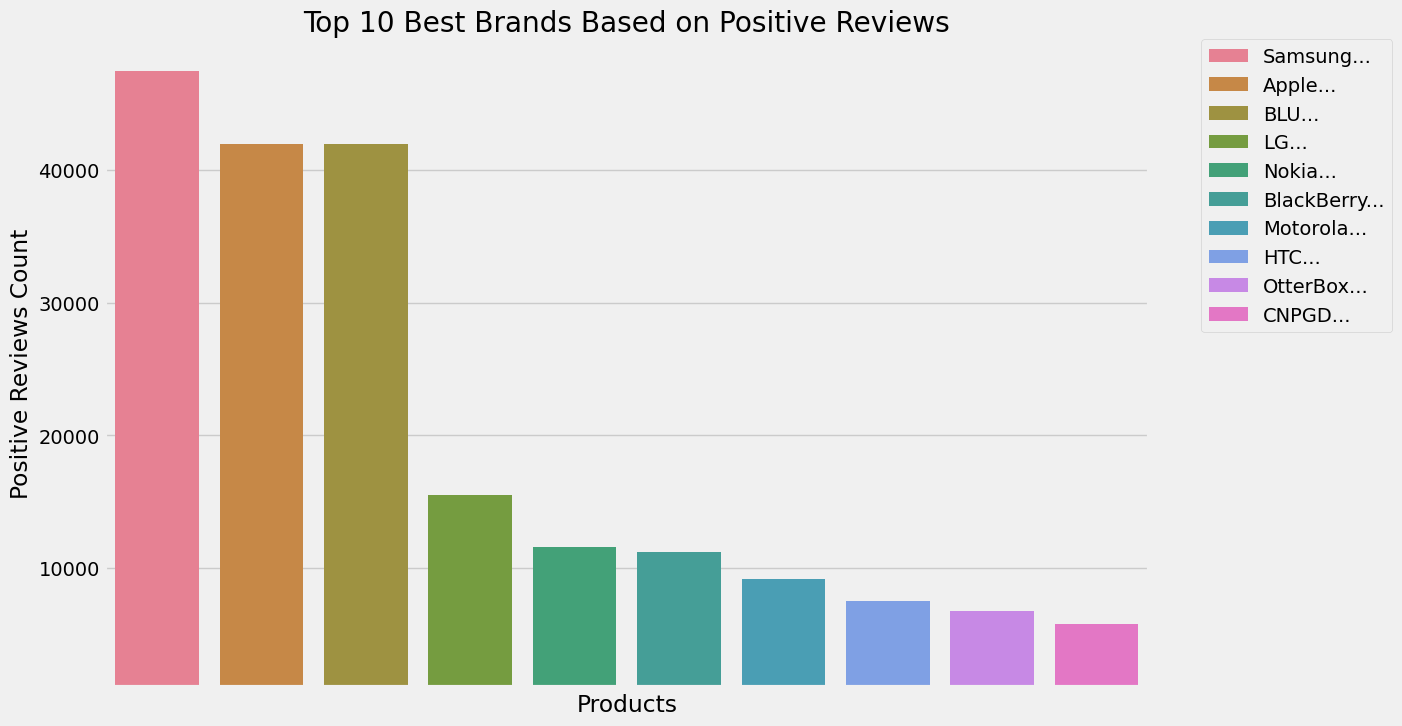

In [9]:
# Top 10 Best Brands Based on Positive Reviews - Visualization
# Filter data for products with a rating greater than 3, group by brand, and count positive reviews
bestbrand = (df[df['Rating'] > 3]
             .set_index('Brand Name')
             .groupby(level=0)['Reviews']
             .agg(['count'])
             .sort_values(['count'], ascending=False)[:10])

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=bestbrand.index, y=bestbrand['count'], hue=bestbrand.index.str[:50] + '...', dodge=False)

# Adjust plot settings
plt.ylim(1000,)
plt.xticks([])
plt.xlabel('Products')
plt.ylabel('Positive Reviews Count')
plt.title('Top 10 Best Brands Based on Positive Reviews')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### 3.Top 10 worst products
#### Worstproduct: 
This DataFrame is created by filtering products with a rating below 3, grouping by the 'Product Name,' and counting the number of negative reviews for each product. The top 10 products with the highest count of negative reviews are selected and stored in this DataFrame.

#### Bar Plot: 
The Seaborn barplot function is used to create a bar plot. The x-axis represents the index of the products, the y-axis represents the count of negative reviews, and different products are distinguished by color.

#### Plot Settings:

- plt.ylim(250,): Set the y-axis limit to start from 250 to focus on products with a higher number of negative reviews.
- plt.xticks([]): Remove x-axis ticks for better readability.
- plt.xlabel('Products') and plt.ylabel('Negative Reviews Count'): Label the x and y axes.
- plt.title('Top 10 Worst Products Based on Negative Reviews'): Provide a title for the plot.
- plt.legend(...): Display the legend to indicate product names (truncated for readability).

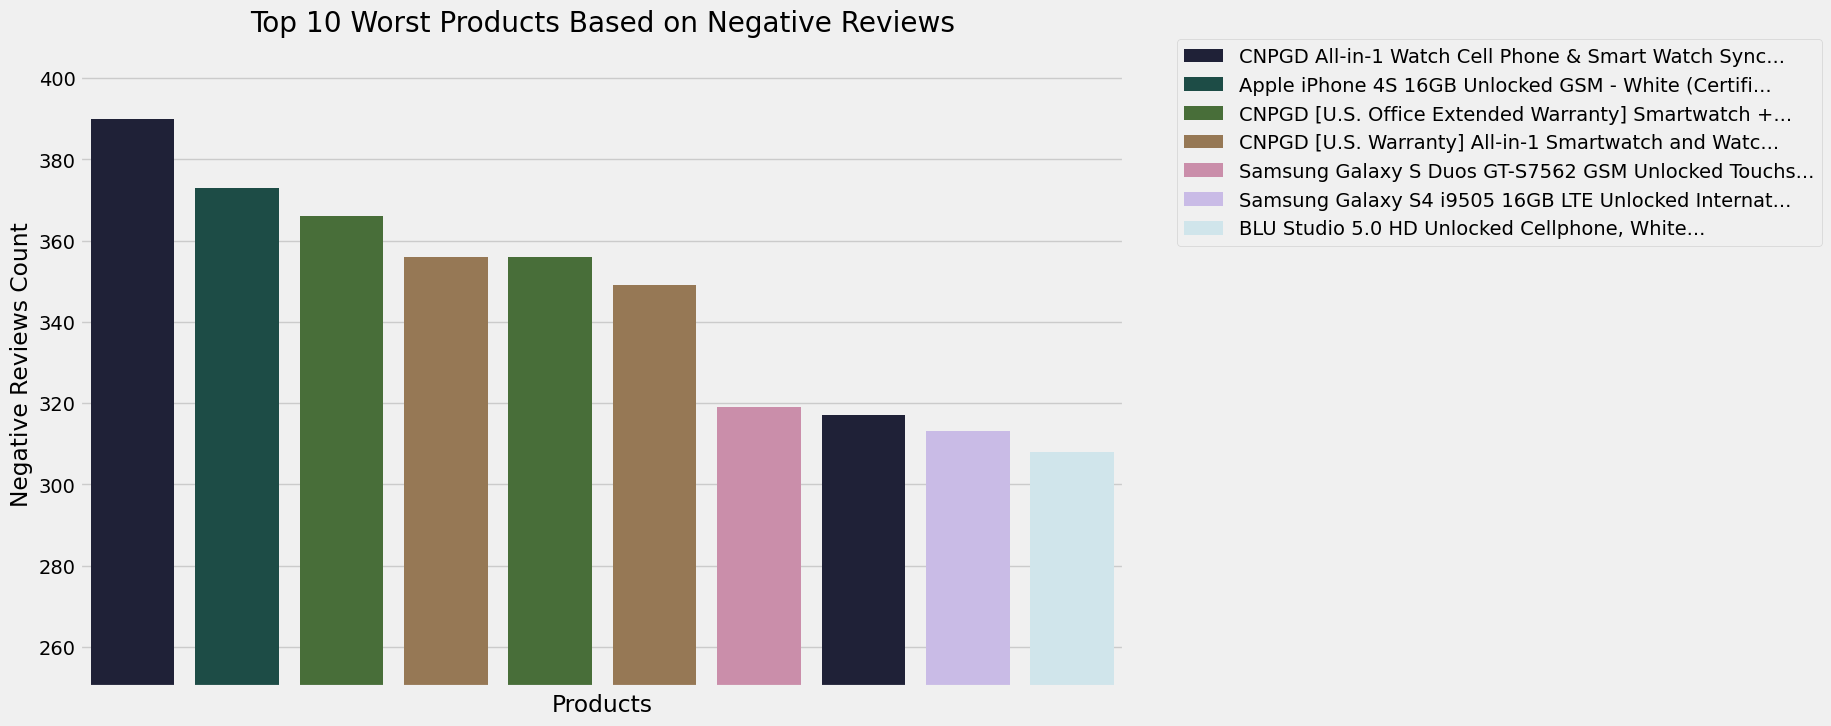

In [10]:
# Top 10 Worst Products Based on Negative Reviews - Visualization
# Filter data for products with a rating below 3, group by product, and count negative reviews
worstproduct = (df[df['Rating'] < 3]
                .set_index('Product Name')
                .groupby(level=0)['Reviews']
                .agg(['count'])
                .sort_values(['count'], ascending=False)[:10])

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=worstproduct.reset_index().index, y=worstproduct['count'],
            hue=worstproduct.index.str[:50] + '...', dodge=False, palette=sns.color_palette("cubehelix", 7))

# Adjust plot settings
plt.ylim(250,)
plt.xticks([])
plt.xlabel('Products')
plt.ylabel('Negative Reviews Count')
plt.title('Top 10 Worst Products Based on Negative Reviews')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### 4.Best budget products under 500 dollars
#### Budget: 
This DataFrame is created by filtering products with a rating above 3 and a price below 500 dollars ,grouping by the 'Product Name,' and counting the number of positive reviews for each product. The top 10 budget products are selected and stored in this DataFrame.

#### Retrieve Prices: 
The corresponding prices for the budget products are retrieved to include in the visualization.

#### Plot Settings:

- plt.ylim(750,): Set the y-axis limit to start from 750 to focus on products with a higher number of positive reviews.
- plt.ylabel('Positive Reviews Count'): Label the y-axis.
- plt.title('Best Budget Products Under $500'): Provide a title for the plot.
- plt.legend(...): Display the legend to indicate product names.

This visualization helps identify budget-friendly products with a high number of positive reviews and a price below $500.

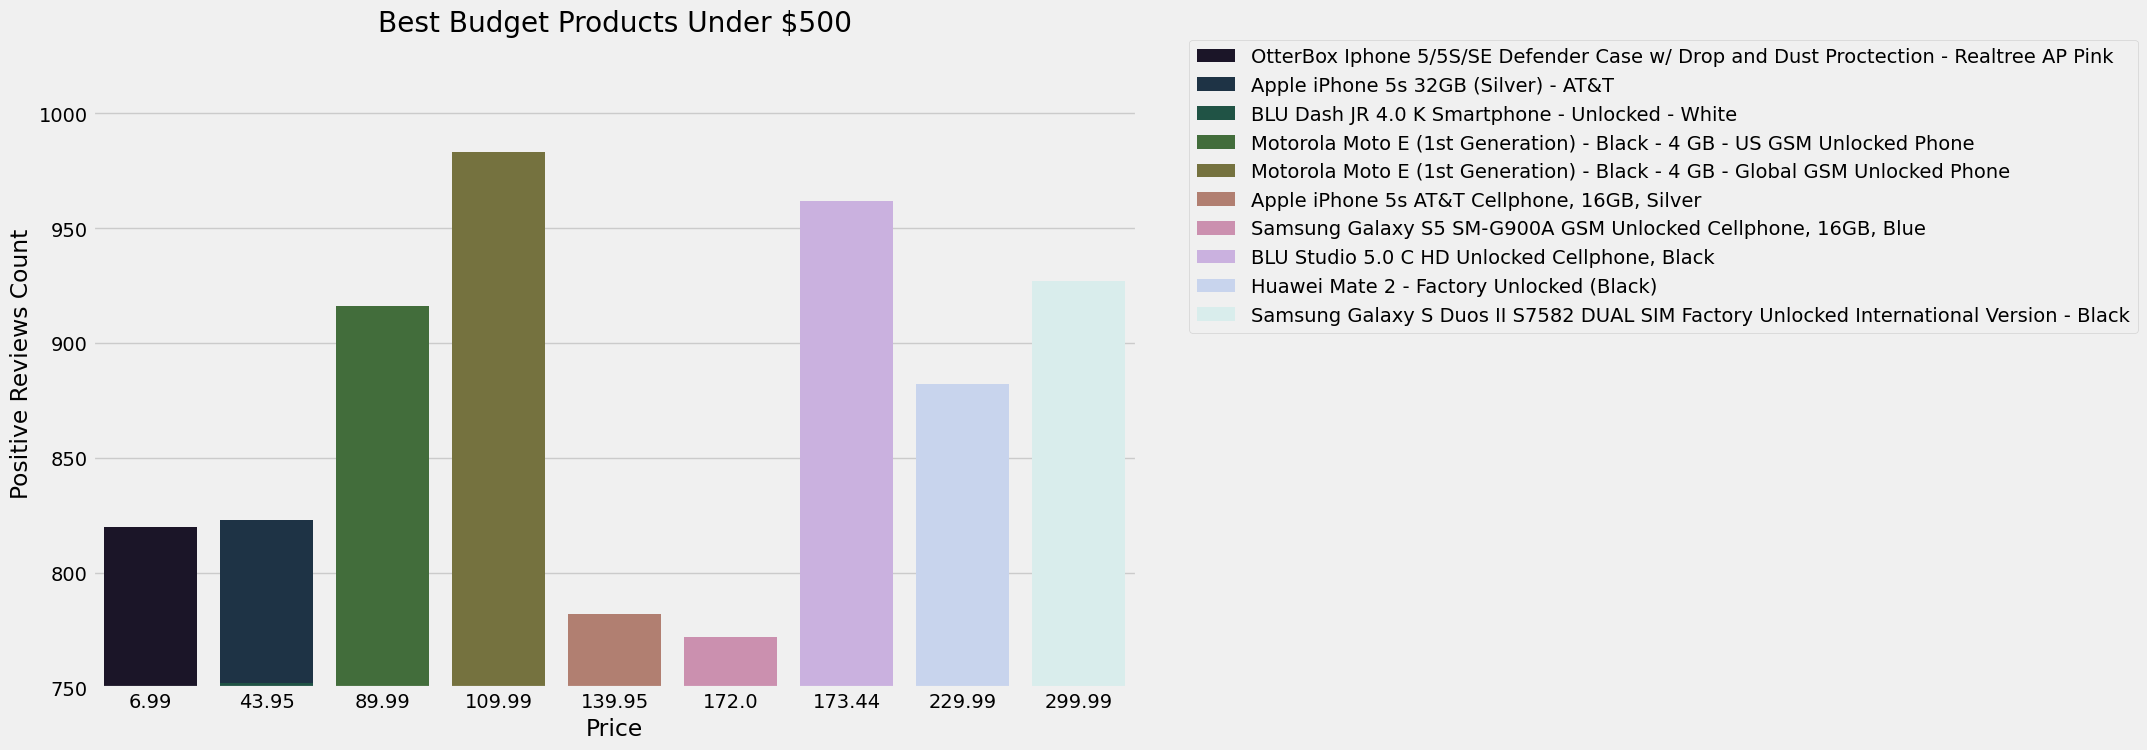

In [11]:
# Best Budget Products Under $500 - Visualization
# Filter data for products with a rating above 3 and price below $500
budget = (df[(df['Rating'] > 3) & (df['Price'] < 500)]
          .set_index('Product Name')
          .groupby(level=0)['Price']
          .agg(['count'])
          .sort_values(['count'], ascending=False)[:10])

# Retrieve the corresponding prices for the budget products
grouped = df.set_index('Product Name').loc[budget.index].groupby(level=0)
price = pd.Series(index=budget.index)

for name, group in grouped:
    price.loc[name] = group.Price.iloc[0]

budget['Price'] = price
budget.reset_index(inplace=True)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Price', y='count', dodge=False, hue='Product Name', data=budget, palette=sns.color_palette("cubehelix", 10))

# Adjust plot settings
plt.ylim(750,)
plt.ylabel('Positive Reviews Count')
plt.title('Best Budget Products Under $500')

# Put the legend out of the figure for better visibility
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


### 5.Best high end products under 2000 dollars
#### highend: 
This DataFrame is created by filtering products with a rating above 3 and a price above 900 dollars, grouping by the 'Product Name,' and counting the number of positive reviews for each product. The top 10 high-end products are selected and stored in this DataFrame.

#### Retrieve Prices: 
The corresponding prices for the high-end products are retrieved to include in the visualization.

#### Bar Plot: 
The Seaborn barplot function is used to create a bar plot. The x-axis represents the prices, the y-axis represents the count of positive reviews, and different products are distinguished by color.

#### Plot Settings:

- plt.ylabel('Positive Reviews Count'): Label the y-axis.
- plt.title('Best High-End Products Under $2000'): Provide a title for the plot.
- plt.legend(...): Display the legend to indicate product names.

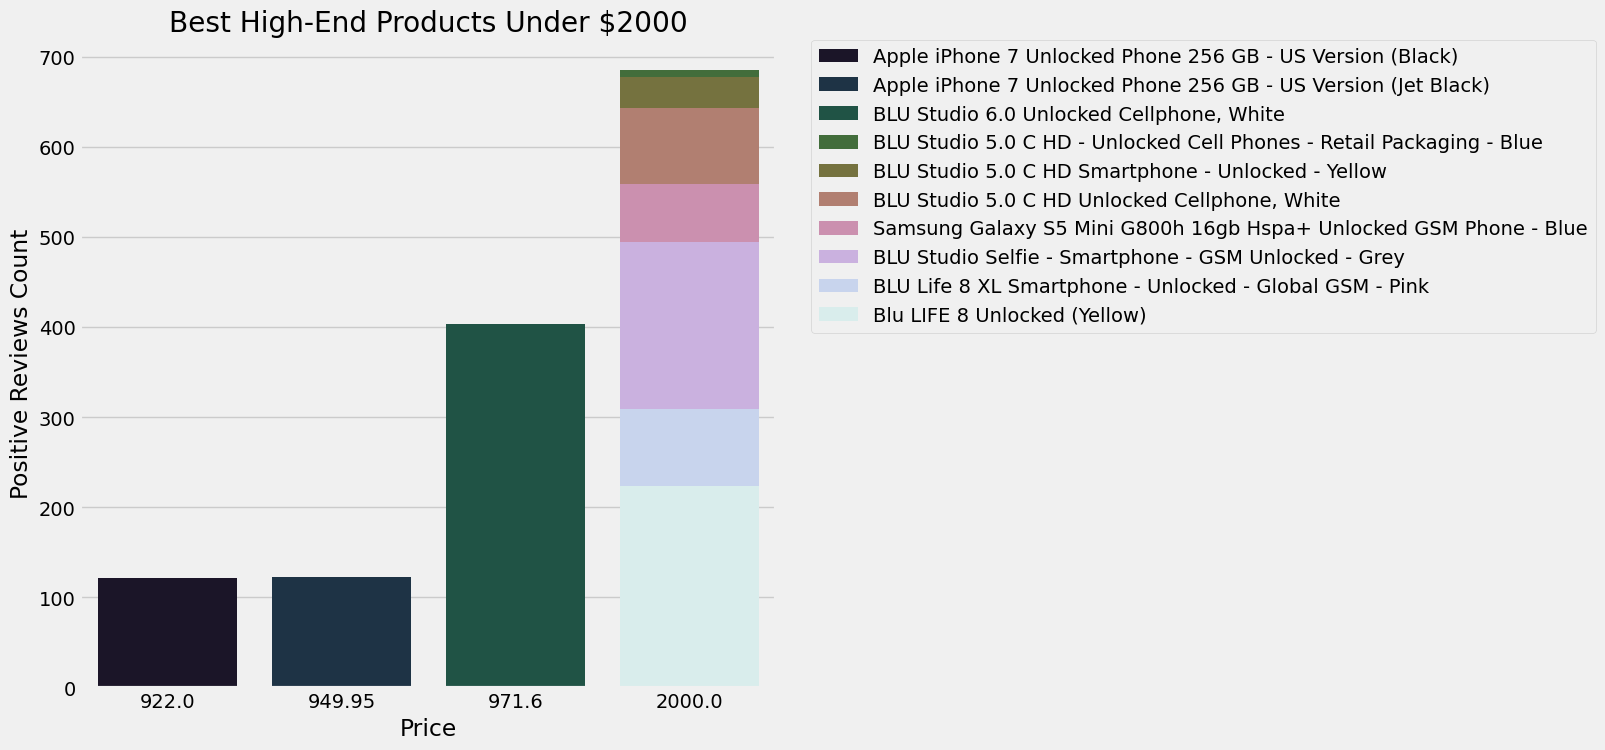

In [12]:
# Best High-End Products Under $2000 
# Filter data for products with a rating above 3 and price above $900
highend = (df[(df['Rating'] > 3) & (df['Price'] > 900)]
           .set_index('Product Name')
           .groupby(level=0)['Price']
           .agg(['count'])
           .sort_values(['count'], ascending=False)[:10])

# Retrieve the corresponding prices for the high-end products
grouped = df.set_index('Product Name').loc[highend.index].groupby(level=0)
price = pd.Series(index=highend.index)

for name, group in grouped:
    price.loc[name] = group.Price.iloc[0]

highend['Price'] = price
highend.reset_index(inplace=True)

# Create a bar plot
plt.figure(figsize=(8, 8))
sns.barplot(x='Price', y='count', dodge=False, hue='Product Name', data=highend, palette=sns.color_palette("cubehelix", 10))

# Adjust plot settings
plt.ylabel('Positive Reviews Count')
plt.title('Best High-End Products Under $2000')

# Put the legend out of the figure for better visibility
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


### NLTK MODEL
#### Sentiment Analysis Function
#### Sentiment_score(review): 
This function takes a text input (review) and returns a sentiment score ranging from 1 to 5. The score indicates the sentiment of the input text, where 1 represents very negative sentiment, and 5 represents very positive sentiment.
BERT Model and Tokenizer
#### AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment'): 
Loads the pre-trained BERT tokenizer specifically designed for sentiment analysis in multiple languages.

#### AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment'): 
Loads the pre-trained BERT model for sequence classification, which is fine-tuned for sentiment analysis.


In [13]:
# Sentiment Analysis using BERT

from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

# Load pre-trained BERT tokenizer and model for sentiment analysis
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

# Define a function for sentiment analysis
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits)) + 1


### Sample Case 
#### Sample Review: 
The review text is extracted from the "Reviews" column of the DataFrame. In this case, we have selected the review at index 58.
#### Sentiment Analysis: 
The sentiment_score function is applied to analyze the sentiment of the sample review. The resulting sentiment score (ranging from 1 to 5) is printed.


In [14]:
# Sample case
text=df["Reviews"][7]
print(text)
sentiment_score(text)


Phone looks good but wouldn't stay charged, had to buy new battery. Still couldn't stay charged long.so I trashed it.MONEY lost, never again will I buy from this person! !!!


1

### DEFINING REQUIRED FUNCTIONS
##### Functions Explanation
#### brand_review_dict(brand_df): 
This function calculates sentiment scores for chunks of reviews and assigns the maximum score to each review for a specific brand.
#### brand(name, df): 
This function retrieves data specific to a given brand from the dataset.
#### senti_data(brand_data): 
This function categorizes sentiment scores into labels ('positive,' 'neutral,' 'negative') and adds a 'Senti' column to the DataFrame.
#### Functions Explanation
- dataset_for_specificbrand(df): This function creates a subset of the dataset for brand-specific visuals. It shuffles the data and selects the first 500 reviews.

- dataset_for_allbrands(df): This function creates a subset of the dataset for overall metrics. It shuffles the data and selects the first 500 reviews.

In [15]:
from tqdm import tqdm

def brand_review_dict(brand_df):
    fres = {}
    for i, row in tqdm(brand_df.iterrows(), total=len(brand_df)):
        text = row['Reviews']
        myid = row['Id']
        
        # Split the review into chunks of 512 tokens
        chunks = [text[i:i+512] for i in range(0, len(text), 512)]
        
        # Calculate sentiment score for each chunk
        scores = [sentiment_score(chunk) for chunk in chunks]
        
        # Assign the maximum sentiment score among all chunks to the review
        fres[myid] = max(scores)
    return fres

# getting specific Brand data
def brand(name, df):
    brand_data = df[df['Brand Name'] == name]
    brand_data.insert(0, 'Id', range(1, 1 + len(brand_data)))
    return brand_data

# getting sentiment score on a scale of 5 using bert
def sentiment_score(brand_review):
    tokens = tokenizer.encode_plus(brand_review, return_tensors='pt', max_length=512, truncation=True)
    result = model(**tokens)
    return int(torch.argmax(result.logits)) + 1

#implementing on df
def brand_review_dict(brand_df):
    fres = {}
    for i, row in tqdm(brand_df.iterrows(), total=len(brand_df)):
        text = row['Reviews']
        myid = row['Id']
        
        # Split the review into chunks of 512 tokens
        chunks = [text[i:i+512] for i in range(0, len(text), 512)]
        
        # Calculate sentiment score for each chunk
        scores = [sentiment_score(chunk) for chunk in chunks]
        
        # Assign the maximum sentiment score among all chunks to the review
        fres[myid] = max(scores)
    return fres
    
# samsung_data['SentimentScores'] = samsung_data['Id'].map(brand_review_dict(samsung_data))


def senti_data(brand_data):
    labels=[]
    for cell in brand_data['SentimentScores']:
        if cell > 3:
            labels.append('positive')   #Good
        elif cell == 3:
            labels.append('neutral')   #Neutral
        else:
            labels.append('negative')   #Poor
        
    # brand_data['Senti'] = labels
    brand_data.loc[:, 'Senti'] = labels

    # del rows['Review Votes']
    return brand_data
    
# taken 5000 reviews for brand specific visuals
def dataset_for_specificbrand(df):
    shuffled_mobile_data = df.sample(frac=1).reset_index(drop=True)
    subset=shuffled_mobile_data.loc[0:500,['Label','Brand Name','Reviews']]# subset.insert(0, 'Id', range(1, 1 + len(subset)))
    return subset
    
# taken 1000 reviews for metrics
def dataset_for_allbrands(df):
    shuffled_mobile_data = df.sample(frac=1).reset_index(drop=True)
    subset=shuffled_mobile_data.loc[0:500,['Label','Brand Name','Reviews']]# subset.insert(0, 'Id', range(1, 1 + len(subset)))
    return subset

### Brand Specific Sentiment Analysis
- dataset_for_specificbrand(df): This function creates a shuffled subset of the dataset, containing columns for labels, brand names, and reviews. The subset is designed for brand-specific visuals.

- Disable Chained Assignment Warning: The warning related to chained assignment in pandas is temporarily disabled for cleaner code.

In [16]:
# Creating a Subset for Specific Brand Visuals
# Disable pandas chained assignment warning
pd.options.mode.chained_assignment = None

# Create a subset for specific brand visuals
subset = dataset_for_specificbrand(df)

### SAMSUNG
##### Visualization Explanation
#### Samsung_data: Extracted data for Samsung products from the subset.
- Calculate Sentiment Scores: Sentiment scores are calculated for Samsung reviews using the brand_review_dict function.

- Categorize Sentiment Scores: The sentiment scores are categorized into labels ('positive,' 'neutral,' 'negative') using the senti_data function.

- Calculate Sentiment Distribution: The distribution of sentiment labels is calculated to visualize the proportions.

- Pie Chart: A pie chart is created using Matplotlib to visualize the sentiment distribution for Samsung products.

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:20<00:00,  4.96it/s]


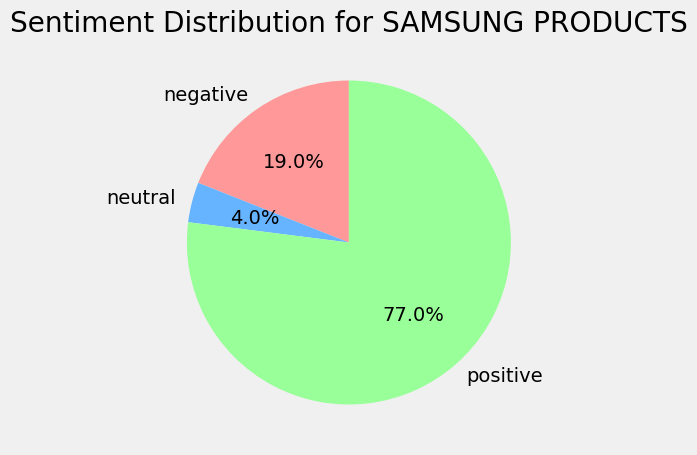

In [17]:
# Sentiment Distribution Visualization for Samsung Products

# Extract data for Samsung brand from the subset
samsung_data = brand('Samsung', subset)

# Calculate sentiment scores for Samsung reviews
samsung_data['SentimentScores'] = samsung_data['Id'].map(brand_review_dict(samsung_data))

# Categorize sentiment scores into labels and add a 'Senti' column
samsung_senti = senti_data(samsung_data)

# Calculate sentiment distribution
sentiment_counts = samsung_senti['Senti'].value_counts().sort_index()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Sentiment Distribution for SAMSUNG PRODUCTS')
plt.show()

### APPLE
##### Visualization Explanation
#### apple_data: Extracted data for Apple products from the subset.

- Calculate Sentiment Scores: Sentiment scores are calculated for Apple reviews using the brand_review_dict function.

- Categorize Sentiment Scores: The sentiment scores are categorized into labels ('positive,' 'neutral,' 'negative') using the senti_data function.

- Calculate Sentiment Distribution: The distribution of sentiment labels is calculated to visualize the proportions.

- Pie Chart: A pie chart is created using Matplotlib to visualize the sentiment distribution for Apple products.

100%|██████████████████████████████████████████████████████████████████████████████████| 77/77 [00:13<00:00,  5.81it/s]


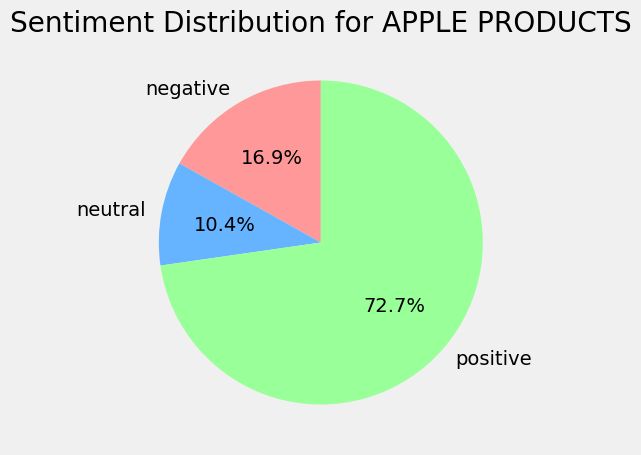

In [18]:
# Sentiment Distribution Visualization for Apple Products

# Extract data for Apple brand from the subset
apple_data = brand('Apple', subset)

# Calculate sentiment scores for Apple reviews
apple_data['SentimentScores'] = apple_data['Id'].map(brand_review_dict(apple_data))

# Categorize sentiment scores into labels and add a 'Senti' column
apple_senti = senti_data(apple_data)

# Calculate sentiment distribution
sentiment_counts = apple_senti['Senti'].value_counts().sort_index()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Sentiment Distribution for APPLE PRODUCTS')
plt.show()

### BLU
##### Visualization Explanation
#### blu_data: Extracted data for BLU products from the subset.

- Calculate Sentiment Scores: Sentiment scores are calculated for BLU reviews using the brand_review_dict function.

- Categorize Sentiment Scores: The sentiment scores are categorized into labels ('positive,' 'neutral,' 'negative') using the senti_data function.

- Calculate Sentiment Distribution: The distribution of sentiment labels is calculated to visualize the proportions.

- Pie Chart: A pie chart is created using Matplotlib to visualize the sentiment distribution for BLU products.

100%|██████████████████████████████████████████████████████████████████████████████████| 86/86 [00:15<00:00,  5.58it/s]


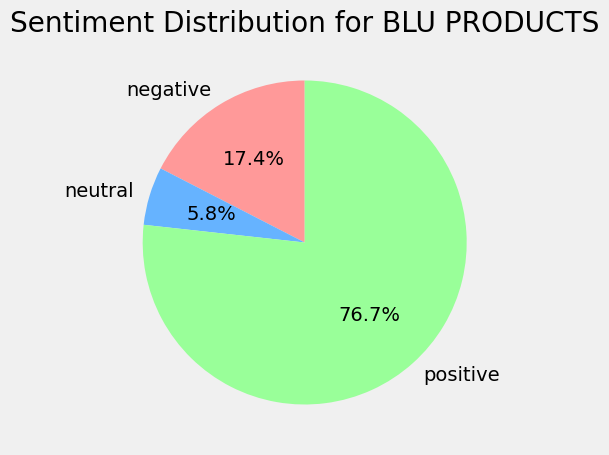

In [19]:
# Sentiment Distribution Visualization for BLU Products
# Extract data for BLU brand from the subset
blu_data = brand('BLU', subset)

# Calculate sentiment scores for BLU reviews
blu_data['SentimentScores'] = blu_data['Id'].map(brand_review_dict(blu_data))

# Categorize sentiment scores into labels and add a 'Senti' column
blu_senti = senti_data(blu_data)

# Calculate sentiment distribution
sentiment_counts = blu_senti['Senti'].value_counts().sort_index()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Sentiment Distribution for BLU PRODUCTS')
plt.show()


### FINE TUNING
#### subset: 
The subset of reviews is created, including columns for labels, brand names, reviews, and sentiment scores.
- Calculate Sentiment Scores: Sentiment scores are calculated for the subset reviews using the brand_review_dict function.

- Categorize Sentiment Scores: The sentiment scores are categorized into labels ('positive,' 'neutral,' 'negative') using the senti_data function.

- Display Sentiment Distribution: The sentiment distribution for the subset is displayed, showing the counts of each sentiment label.

In [20]:
# Sentiment Analysis for a Specific Subset of Reviews
# Add 'Id' column to the subset
subset= dataset_for_allbrands(df)
subset.insert(0, 'Id', range(1, 1 + len(subset)))

# Calculate sentiment scores for the subset reviews
subset['SentimentScores'] = subset['Id'].map(brand_review_dict(subset))

# Categorize sentiment scores into labels and add a 'Senti' column
subset_senti = senti_data(subset)

# Display the sentiment distribution for the subset
subset_senti


100%|████████████████████████████████████████████████████████████████████████████████| 501/501 [01:21<00:00,  6.18it/s]


,Id,Label,Brand Name,Reviews,SentimentScores,Senti
0,1,positive,Apple,Phone works great. No problems getting access ...,5,positive
1,2,positive,Apple,came in clean and as described in good condition,5,positive
2,3,neutral,Nokia,No doubt phone is good and camera is perfect b...,4,positive
3,4,positive,Sony,This is a better cel. I relaly happy. I love t...,5,positive
4,5,positive,Apple,Nice quality camera,5,positive
...,...,...,...,...,...,...
496,497,negative,Trait-Tech,Don't pick up in certain spots,2,negative
497,498,positive,FIGO,Loved the phone but then got a better one,3,neutral
498,499,positive,"Quality Technology Industrial Co., ltd.",Great little phine to use for bluetoothe,5,positive
499,500,negative,CNPGD,Wasn't what I was looking for.,2,negative


### Evaluation Metrics
- Accuracy: The overall accuracy of the sentiment classification model on the specific subset of reviews.

- Classification Report: A detailed report containing precision, recall, F1-score, and support for each sentiment class.

- Confusion Matrix: A matrix showing the number of true positive, true negative, false positive, and false negative predictions.

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have a DataFrame named df with the specified columns
y_true =subset['Label']
y_pred = subset['Senti']

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
class_report = classification_report(y_true, y_pred)
print('Classification Report:\n', class_report)

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:\n', conf_matrix)


Accuracy: 0.8822
Classification Report:
               precision    recall  f1-score   support

    negative       0.81      0.91      0.86       109
     neutral       0.41      0.41      0.41        39
    positive       0.96      0.93      0.94       353

    accuracy                           0.88       501
   macro avg       0.73      0.75      0.74       501
weighted avg       0.89      0.88      0.88       501

Confusion Matrix:
 [[ 99   6   4]
 [ 14  16   9]
 [  9  17 327]]


### Heatmap Explanation
- Heatmap: The confusion matrix is visualized using a heatmap, where each cell represents the count of instances for a particular combination of true and predicted labels.

- Annotations: Numeric values are annotated within each cell, indicating the count of instances.

- Color Gradient: The color intensity represents the count of instances, with darker shades indicating higher counts.

- Axes and Title: The axes are labeled with the predicted and true labels, and the title provides an overview of the visualization.

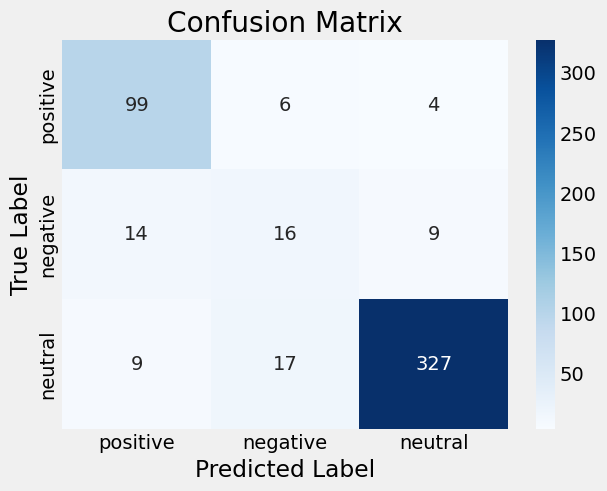

In [22]:
# Assuming you have already calculated the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
# Create a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=subset['Senti'].unique(), yticklabels=subset['Senti'].unique())
# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Display the plot
plt.show()
